<a href="https://colab.research.google.com/github/women-in-ai-ireland/October-2020-WaiLEARN-004/blob/master/Online_Retail_Janeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library
import pandas as pd
from datetime import datetime #to fix the date
import numpy as np
import datetime as dt

#For Data  Visualization
import matplotlib.pyplot as plt
import seaborn as sns


2. Data insights

*  The dataset has 541,909 rows and 8 columns
*  The variables CustomerId and Description are the ones with the highest number of missing values.
*  The average product price is 4.61 pounds (in the part where we run the "**describe**" code the *mean* is 4.61 )
*  The following variables need to be converted in the next steps: CustomerId to object.







In [ ]:
data = pd.read_excel('/content/Online_Retail.xlsx')
data.head(5)
  

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# ***1***. Libraries that needed to be imported to read and create visualizations ***bold text***




---



---

bold text




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


3. Data Manipulation



*   Drop the raws with null values 
*   Convert **Invoice Date** to datetime64 and **CustomerID **  to object



In [ ]:
data = data.dropna(subset=['CustomerID'])

In [ ]:
data1 = data.dropna(subset=['CustomerID'])

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.shape

(406829, 8)

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate)

In [ ]:
data['CustomerID'] = data ['CustomerID']. astype (str)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
data['Quantity'] * data['UnitPrice']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Length: 406829, dtype: float64

In [ ]:
data ['Total Price'] = data['Quantity'] * data['UnitPrice']

In [ ]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df = data.groupby('Country', as_index= False).InvoiceNo.count().sort_values(by= 'InvoiceNo',ascending=False)
df.head(5)

,Country,InvoiceNo
35,United Kingdom,361878
14,Germany,9495
13,France,8491
10,EIRE,7485
30,Spain,2533


In [ ]:
df = data.groupby('Country', as_index= False).Quantity.sum().sort_values(by= 'Quantity',ascending=False)
df.head(5)

,Country,Quantity
35,United Kingdom,4008533
23,Netherlands,200128
10,EIRE,136329
14,Germany,117448
13,France,109848


The 10 countries with the highest number of sales

In [ ]:
df = data.groupby('Country', as_index= False).agg({'InvoiceNo': pd.Series.count, 'Quantity': pd.Series.sum, 'Total Price':pd.Series.sum,}).sort_values(by= 'InvoiceNo',ascending=False)
df.head(10)


,Country,InvoiceNo,Quantity,Total Price
35,United Kingdom,361878,4008533,6767873.394
14,Germany,9495,117448,221698.210
13,France,8491,109848,196712.840
10,EIRE,7485,136329,250285.220
30,Spain,2533,26824,54774.580
23,Netherlands,2371,200128,284661.540
3,Belgium,2069,23152,40910.960
32,Switzerland,1877,29778,55739.400
26,Portugal,1480,16044,29059.810
0,Australia,1259,83653,137077.270


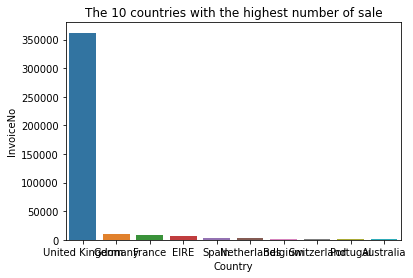

In [ ]:
df = data.groupby('Country', as_index= False).InvoiceNo.count().sort_values(by= 'InvoiceNo',ascending=False)
#Plot The 10 countries with the highest number of sale
sns.barplot(x='Country', y='InvoiceNo', data= df.head(10))
plt.title('The 10 countries with the highest number of sale')
plt.show()

In [ ]:
df = data.groupby('Description', as_index= False).Quantity.sum().sort_values(by= 'Quantity',ascending=False)
df.head(10)

,Description,Quantity
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1771,JUMBO BAG RED RETROSPOT,45066
217,ASSORTED COLOUR BIRD ORNAMENT,35314
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147
2279,PACK OF 72 RETROSPOT CAKE CASES,33409
2612,POPCORN HOLDER,30504
2669,RABBIT NIGHT LIGHT,27094
2057,MINI PAINT SET VINTAGE,25880
2245,PACK OF 12 LONDON TISSUES,25321
2277,PACK OF 60 PINK PAISLEY CAKE CASES,24163


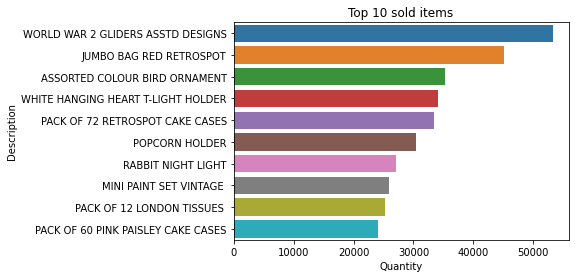

In [ ]:
df = data.groupby('Description', as_index= False).Quantity.sum().sort_values(by= 'Quantity',ascending=False)
#Plot the 10 most sold items
sns.barplot(x='Quantity', y='Description', data= df.head(10))
plt.title('Top 10 sold items')
plt.show()

COHORT ANALYSIS

In [ ]:
#Create a copy of the data for the cohort analysis
cohort = data1.copy() 

Converting string variable to date time

In [ ]:
cohort['InvoiceDate']= pd.to_datetime(data.InvoiceDate)

In [ ]:
cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


Converting variable to text 

In [ ]:
data1['CustomerID'] = data1['CustomerID'].astype(str)

In [ ]:
#Use the datetime fundtion to create a Month column (without the time)
def get_month(x):
    return dt.datetime(x.year,x.month,1) 

#Create a new colum "InvoiceMonth
cohort['InvoiceMonth'] = cohort ['InvoiceDate'].apply(get_month) 

#Create a 'CohortMonth' column by grouping 'CustomerID' and selec the 'InvoiceMonth' value
grouping = cohort.groupby ('CustomerID')['InvoiceMonth']

#With code (transform) assign the minimum InvoiceMonth value to the dataset
cohort['CohortMonth']= grouping.transform('min')

In [ ]:
#When pass a datetime column this funtions splits out year, month and day 
def get_date_int (df, column):
  year = df[column].dt.year
  month = df[column].dt.month
  return year, month

In [ ]:
# Split the "InvoiceMonth" column to get the integers from data 
invoice_year, invoice_month = get_date_int(cohort,'InvoiceMonth')

# Split the "CohortMonth" column to get the integers from data 
cohort_year, cohort_month = get_date_int(cohort,'CohortMonth')

In [ ]:
# To creat the 'CohortIndex' we need to create a variable call year_diff (diffrence between the invoice year and cohort year)
year_diff = invoice_year - cohort_year

# Difference between invoice_month and cohort_month
month_diff = invoice_month - cohort_month

In [ ]:
#Now we create the 'CohortIndex' column 
cohort['CohortIndex'] = year_diff * 12 + month_diff + 1

In [ ]:
cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [ ]:
print(cohort['CohortIndex'].nunique())

13


In [ ]:
#Group the data by colums 'CohortMonth' and 'CohortIndex'
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

In [ ]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)*100

In [ ]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.185654,33.438819,38.713080,35.970464,39.662447,37.974684,35.443038,35.443038,39.451477,37.341772,50.000000,27.42616
2011-01-01,100.0,23.990499,28.266033,24.228029,32.779097,29.928741,26.128266,25.653207,31.116390,34.679335,36.817102,14.964371,NaN
2011-02-01,100.0,24.736842,19.210526,27.894737,26.842105,24.736842,25.526316,28.157895,25.789474,31.315789,9.210526,NaN,NaN
2011-03-01,100.0,19.090909,25.454545,21.818182,23.181818,17.727273,26.363636,23.863636,28.863636,8.863636,NaN,NaN,NaN
2011-04-01,100.0,22.742475,22.073579,21.070234,20.735786,23.745819,23.076923,26.086957,8.361204,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.655914,17.204301,17.204301,21.505376,24.372760,26.523297,10.394265,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.851064,18.723404,27.234043,24.680851,33.617021,10.212766,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.942408,20.418848,23.036649,27.225131,11.518325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.149701,25.149701,25.149701,13.772455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Creat retention as a percentage 

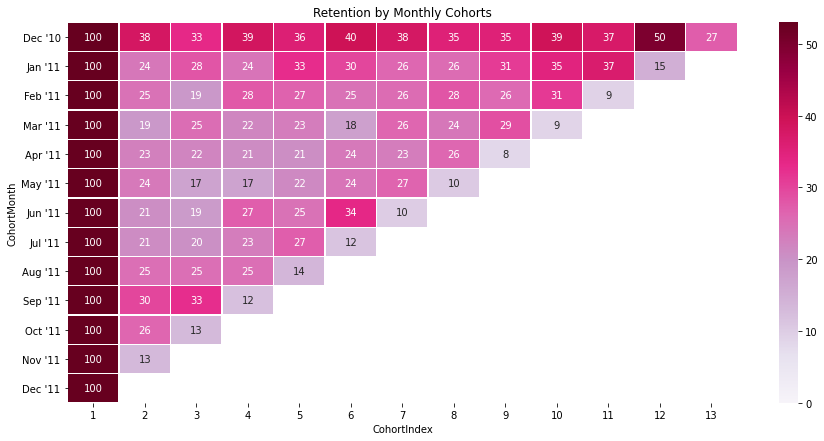

In [ ]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

# Initialize inches plot figure
plt.figure(figsize=(15,7))

# Add a title
plt.title('Retention by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data=retention,
            annot = True,
            cmap = "PuRd",
            vmin = 0.0,
 #          vmax = 0.5,    
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.0f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show();       


**RFM Analysis**


In the The 10 countries with the highest number of sale chart, you can observe most of the customers are from the "United Kingdom". So, I will filter data for United Kingdom customer.

In [ ]:
uk_data1=data1[data1.Country=='United Kingdom']

In [ ]:
uk_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  object        
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 24.8+ MB


In [ ]:
uk_data1.describe()

,Quantity,UnitPrice
count,361878.000000,361878.000000
mean,11.077029,3.256007
std,263.129266,70.654731
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,4.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


Some of the customers have ordered in a negative quantity, which is not possible. So, I need to filter Quantity greater than zero.

In [ ]:
uk_data1 = uk_data1[(uk_data1['Quantity']>0)]

**Filter the necesary column**

The necessary columns for RFM analysis are: *CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice*.

*CustomerId* will uniquely define your customer, *InvoiceDate* help you calculate recency of purchase, *InvoiceNo* helps you to count the number of time transaction performed(frequency), *Quantity* purchased in each transaction and* UnitPrice* of each unit purchased by the customer will help you to calculate the total purchased amount.

In [ ]:
uk_data1=uk_data1[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]


In [ ]:
uk_data1['TotalPrice'] = uk_data1['Quantity'] * uk_data1['UnitPrice']

In [ ]:
uk_data1['InvoiceDate'].min(),uk_data1['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [ ]:
PRESENT = dt.datetime(2011,12,10)
uk_data1['InvoiceDate'] = pd.to_datetime(uk_data1['InvoiceDate'])

In [ ]:
uk_data1.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34



Here, I'm going to perform following opertaions:

RFM

For Recency, Calculate the number of days between present date and date of last purchase each customer.

For Frequency, Calculate the number of orders for each customer.

For Monetary, Calculate sum of purchase price for each customer.

In [ ]:
rfm = uk_data1.groupby('CustomerID').agg({'InvoiceDate': lambda date:(PRESENT - date.max()).days,'TotalPrice':lambda price:price.sum(),'InvoiceNo': lambda num: len(num)})

In [ ]:
rfm.head()

,InvoiceDate,TotalPrice,InvoiceNo
CustomerID,,,
12346.0,325,77183.60,1
12747.0,2,4196.01,103
12748.0,0,33719.73,4596
12749.0,3,4090.88,199
12820.0,3,942.34,59


In [ ]:
rfm.columns

Index(['InvoiceDate', 'TotalPrice', 'InvoiceNo'], dtype='object')

In [ ]:
# Change the name of columns
rfm.columns=['frequency','monetary','recency']

In [ ]:
rfm['recency'] = rfm['recency'].astype(int)

In [ ]:
rfm.head()

,frequency,monetary,recency
CustomerID,,,
12346.0,325,77183.60,1
12747.0,2,4196.01,103
12748.0,0,33719.73,4596
12749.0,3,4090.88,199
12820.0,3,942.34,59


**Computing Quantile of RFM values**

qcut() is Quantile-based discretization function. qcut bins the data based on sample quantiles. I will devide the custoners in quantiles to determin the top customers, the ones with the lowest recency, highest frequency and monetary amounts

In [ ]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 5, ['1','2','3','4','5'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 5, ['5','4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 5, ['5','4','3','2','1'])

In [ ]:
rfm.head()


,frequency,monetary,recency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,77183.60,1,1,1,1
12747.0,2,4196.01,103,4,5,1
12748.0,0,33719.73,4596,5,5,1
12749.0,3,4090.88,199,5,5,1
12820.0,3,942.34,59,4,5,2


**RFM Result Interpretation**
Combine all three quartiles(r_quartile,f_quartile,m_quartile) in a single column, this rank will help you to segment the customers well group.

In [ ]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,frequency,monetary,recency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,77183.60,1,1,1,1,111
12747.0,2,4196.01,103,4,5,1,451
12748.0,0,33719.73,4596,5,5,1,551
12749.0,3,4090.88,199,5,5,1,551
12820.0,3,942.34,59,4,5,2,452


In [ ]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()

,frequency,monetary,recency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,77183.6,1,1,1,1,111
15749.0,235,44534.3,10,1,1,1,111
15098.0,182,39916.5,3,1,1,1,111
13135.0,196,3096.0,1,1,1,1,111
16754.0,372,2002.4,2,1,1,1,111
